Task 2:  Unemployment Analysis with Python

In [14]:
#Import necessary liabraries those are required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file (change the filename if different)
df = pd.read_csv('Unemployment in India.csv')

# Check shape and preview
print(df.shape)
df.head()


(768, 7)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (change the filename if different)
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

# Check shape and preview
print(df.shape)
df.head()

(267, 9)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [16]:
# 👀 Step 2: Understand the Data Structure
print(df.shape)        # Check number of rows and columns
print(df.columns)      # List all column names
print(df.info())       # Get data types and null values info
print(df.describe())   # Summary statistics of numerical columns

(267, 9)
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                 

In [17]:
# 🧹 Step 3: Data Cleaning
print(df.isnull().sum())                # Count missing values per column
df.fillna(method='ffill', inplace=True) # Forward-fill missing data (if any)

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


/tmp/ipython-input-17-264117086.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # Forward-fill missing data (if any)


In [18]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [19]:
df.columns = df.columns.str.strip()


In [20]:
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [21]:
df.columns = df.columns.str.strip()
df['Date']  # try again


,Date
0,31-01-2020
1,29-02-2020
2,31-03-2020
3,30-04-2020
4,31-05-2020
...,...
262,30-06-2020
263,31-07-2020
264,31-08-2020
265,30-09-2020


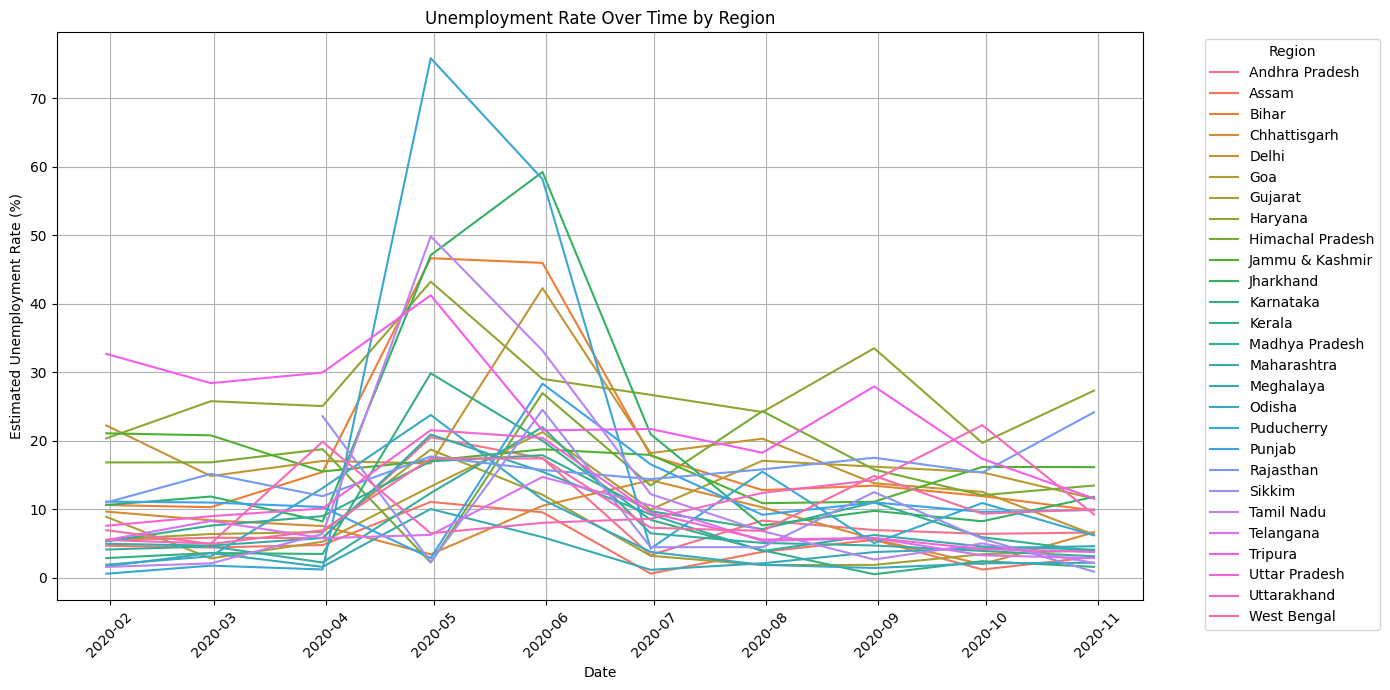

In [25]:
# 🗓️ Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# 🔍 Filter for selected regions
selected_regions = ['Delhi', 'Karnataka', 'Maharashtra', 'Tamil Nadu']
filtered_df = df[df['Region'].isin(selected_regions)]
# 📈 Lineplot: Unemployment Rate over time for each Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')

plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.grid(True)
plt.show()

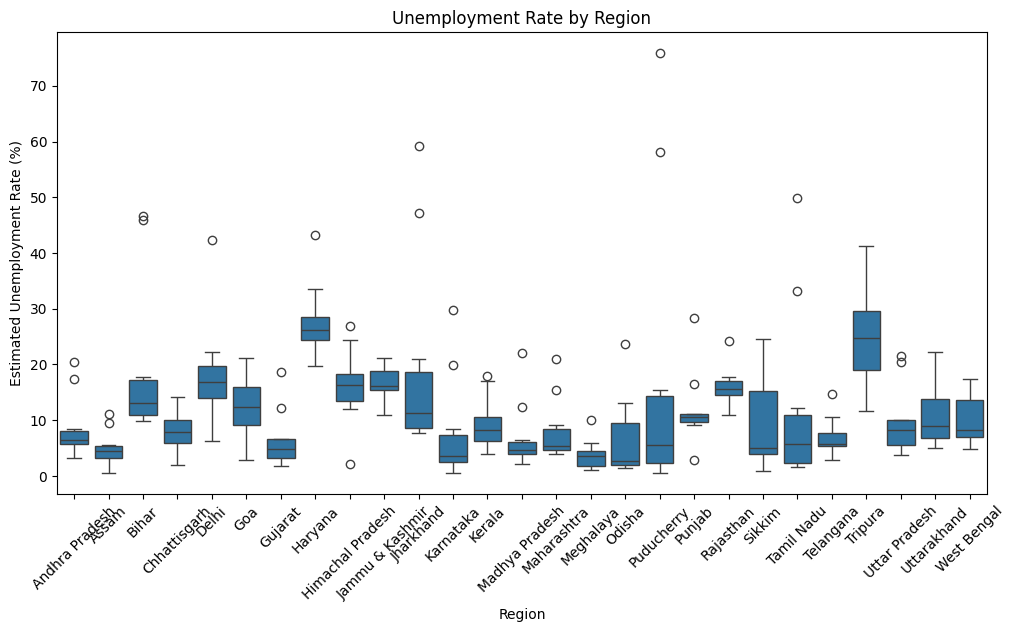

In [27]:
# 📍 Step 5: Unemployment by Region (if Region column exists)
plt.figure(figsize=(12,6))                             # Large figure for readability
sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)') # Boxplot to show spread by Region
plt.xticks(rotation=45)                                 # Rotate x-axis labels
plt.title('Unemployment Rate by Region')
plt.show()

In [28]:
# 🦠 Step 6: Analyze Impact of COVID-19 on Unemployment
# Filter data before and after March 2020
before_covid = df[df['Date'] < '2020-03-01']
after_covid = df[df['Date'] >= '2020-03-01']

In [30]:
# Print average unemployment rate before and after pandemic
print("Average Unemployment Before COVID:", before_covid['Estimated Unemployment Rate (%)'].mean())
print("Average Unemployment After COVID:", after_covid['Estimated Unemployment Rate (%)'].mean())


Average Unemployment Before COVID: 9.231346153846154
Average Unemployment After COVID: 12.963860465116278


In [32]:
# 📈 Step 7: Analyze Monthly/Seasonal Trends (Optional)
df['Month'] = df['Date'].dt.month                   # Extract month from Date column
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()  # Group by month and average

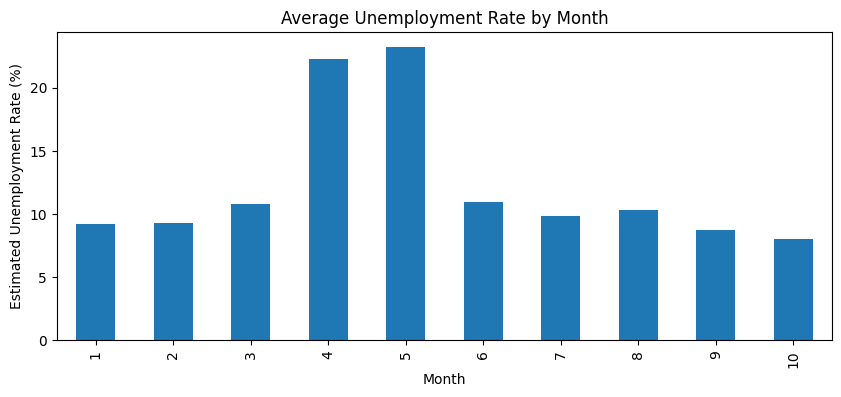

In [34]:
 #Plot average unemployment rate by month
monthly_avg.plot(kind='bar', figsize=(10,4))
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()

In [35]:
# 🧠 Step 8: Draw Insights (write conclusions manually or as markdown)
# Example insight: Unemployment spiked during early 2020
# Example insight: Certain months show higher average unemployment
